# Homework 1

### Author - Attila Gábor Pethő (Neptun: LASM5D)

#### 1.

In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

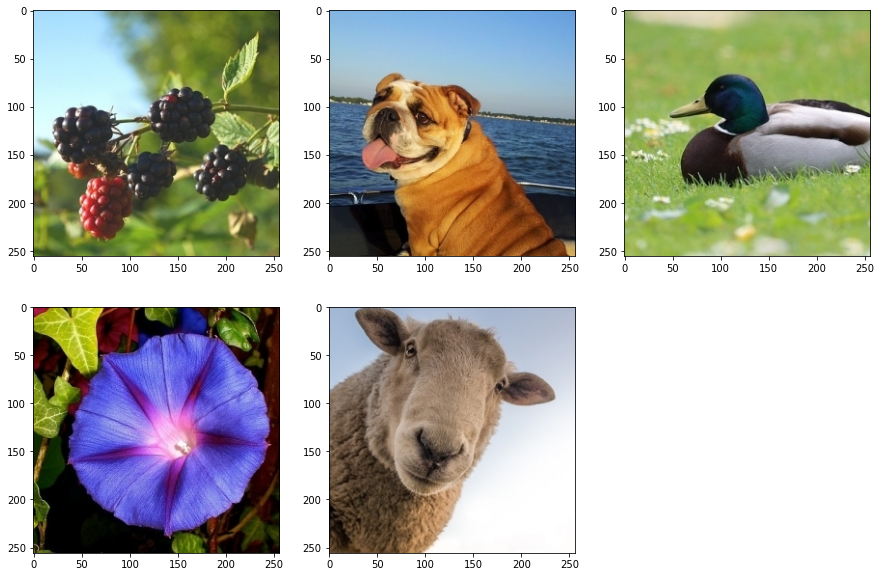

In [3]:
# Reading 5 256x256 images from the Linnaeus 5 dataset

images = []
items = ['berry', 'dog', 'duck', 'flower', 'sheep']

plt.figure(0,figsize=(15,10))

for i in range(len(items)):
    img = cv2.imread('.\\images\\{}.jpg'.format(items[i]))
    images.append(img)
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # convert BGR (opencv) to RGB (pyplot) and show image

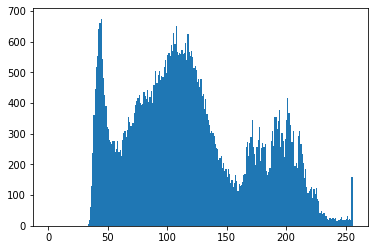

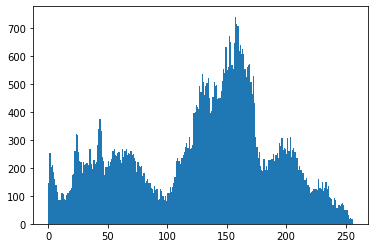

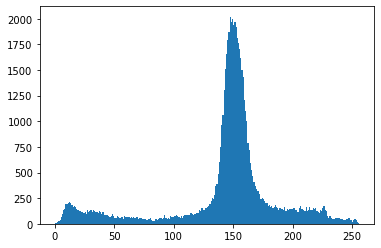

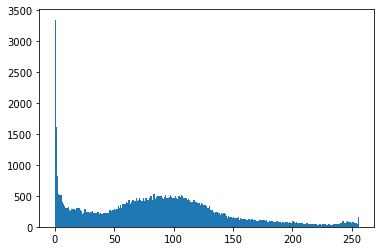

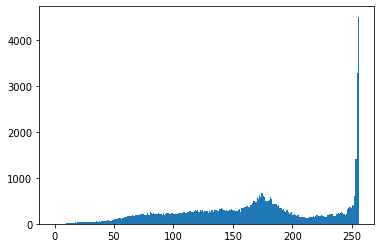

In [4]:
# Create histogram from Red channels

for img in images:
    red_channel = img[:,:,2] # red channel is the third (BGR)
    plt.hist(red_channel.ravel(),256,[0,256])
    plt.show()  # plotting histogram

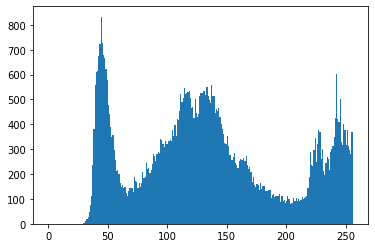

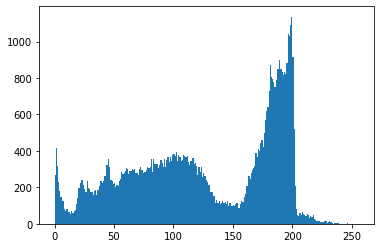

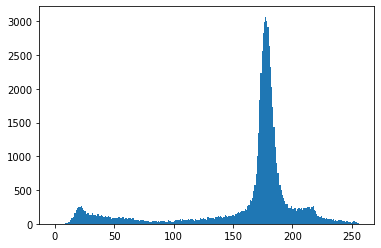

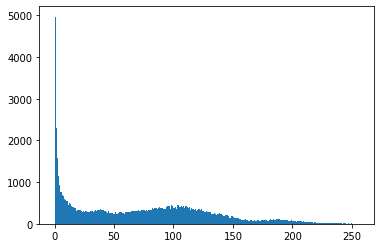

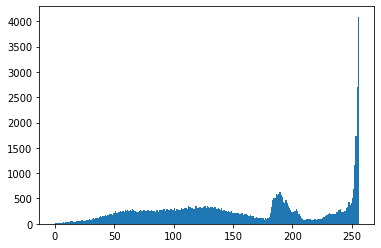

In [5]:
# Create histogram from Green channels

for img in images:
    red_channel = img[:,:,1] # green channel is the second (BGR)
    plt.hist(red_channel.ravel(),256,[0,256])
    plt.show()  # plotting histogram

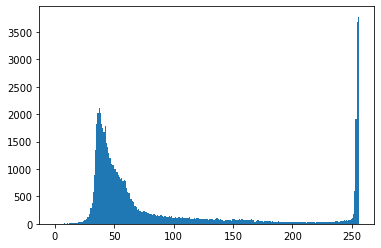

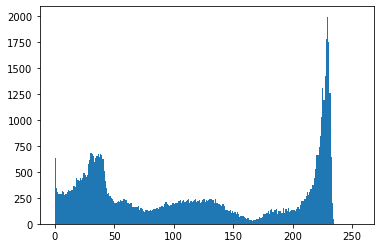

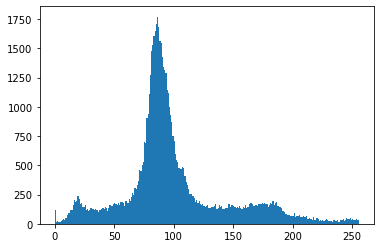

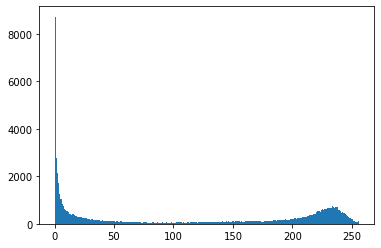

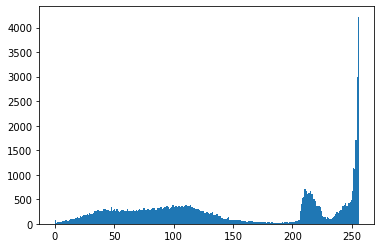

In [6]:
# Create histogram from Blue channels

for img in images:
    red_channel = img[:,:,0] # blue channel is the first (BGR)
    plt.hist(red_channel.ravel(),256,[0,256])
    plt.show()  # plotting histogram

#### 2.

In [10]:
# Calculating mean and std values for each channel

for i in range(len(images)):
    print('Mean and std values of {}:\n'.format(items[i]))
    print('    Red:    Mean: {}, Std: {}\n'.format(round(np.mean(images[i][:,:,2]),2),round(np.std(images[i][:,:,2]),2)))
    print('    Green:  Mean: {}, Std: {}\n'.format(round(np.mean(images[i][:,:,1]),2),round(np.std(images[i][:,:,1]),2)))
    print('    Blue:   Mean: {}, Std: {}\n'.format(round(np.mean(images[i][:,:,0]),2),round(np.std(images[i][:,:,0]),2)))

Mean and std values of berry:

    Red:    Mean: 119.88, Std: 52.43

    Green:  Mean: 135.0, Std: 64.35

    Blue:   Mean: 96.45, Std: 80.02

Mean and std values of dog:

    Red:    Mean: 128.4, Std: 60.58

    Green:  Mean: 124.77, Std: 60.98

    Blue:   Mean: 119.76, Std: 83.34

Mean and std values of duck:

    Red:    Mean: 142.95, Std: 47.01

    Green:  Mean: 161.62, Std: 49.65

    Blue:   Mean: 99.25, Std: 44.32

Mean and std values of flower:

    Red:    Mean: 85.04, Std: 58.91

    Green:  Mean: 71.24, Std: 58.01

    Blue:   Mean: 111.12, Std: 100.68

Mean and std values of sheep:

    Red:    Mean: 166.75, Std: 62.81

    Green:  Mean: 156.3, Std: 71.23

    Blue:   Mean: 149.28, Std: 81.62



In [17]:
# Standardizing the data

std_images = []

for i in range(len(images)):
    std_red   = (images[i][:,:,2] - np.mean(images[i][:,:,2])) / np.std(images[i][:,:,2])
    std_green = (images[i][:,:,1] - np.mean(images[i][:,:,1])) / np.std(images[i][:,:,1])
    std_blue  = (images[i][:,:,0] - np.mean(images[i][:,:,0])) / np.std(images[i][:,:,0])
    std_img = np.stack((std_red, std_green, std_blue), axis=-1)
    std_images.append(std_img)
    
    print('Mean and std values of {}:\n'.format(items[i]))
    print('    Red:    Mean: {}, Std: {}\n'.format(round(np.mean(std_red),2),round(np.std(std_red),2)))
    print('    Green:  Mean: {}, Std: {}\n'.format(round(np.mean(std_green),2),round(np.std(std_red),2)))
    print('    Blue:   Mean: {}, Std: {}\n'.format(round(np.mean(std_red),2),round(np.std(std_red),2)))

Mean and std values of berry:

    Red:    Mean: 0.0, Std: 1.0

    Green:  Mean: 0.0, Std: 1.0

    Blue:   Mean: 0.0, Std: 1.0

Mean and std values of dog:

    Red:    Mean: 0.0, Std: 1.0

    Green:  Mean: -0.0, Std: 1.0

    Blue:   Mean: 0.0, Std: 1.0

Mean and std values of duck:

    Red:    Mean: 0.0, Std: 1.0

    Green:  Mean: 0.0, Std: 1.0

    Blue:   Mean: 0.0, Std: 1.0

Mean and std values of flower:

    Red:    Mean: 0.0, Std: 1.0

    Green:  Mean: 0.0, Std: 1.0

    Blue:   Mean: 0.0, Std: 1.0

Mean and std values of sheep:

    Red:    Mean: 0.0, Std: 1.0

    Green:  Mean: 0.0, Std: 1.0

    Blue:   Mean: 0.0, Std: 1.0



#### 3.

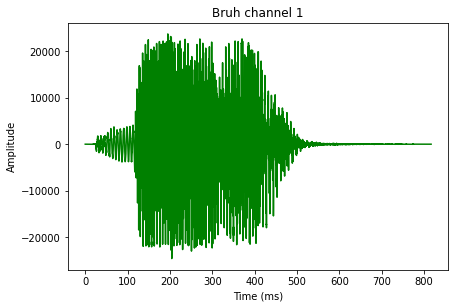

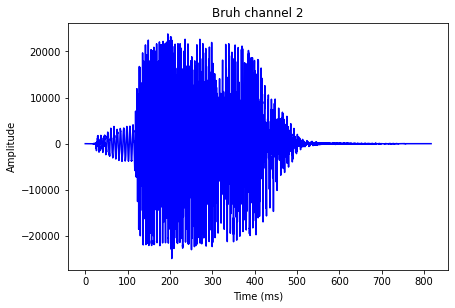

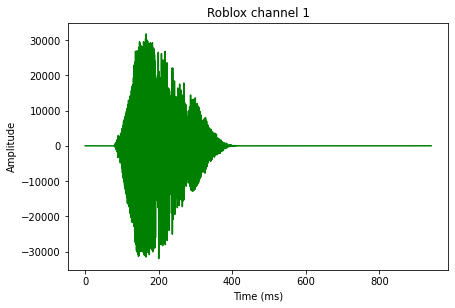

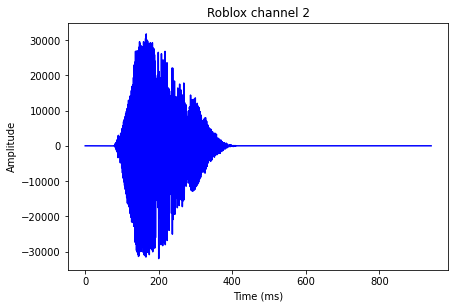

In [41]:
import pylab

import scipy.io.wavfile
from scipy.io.wavfile import read
from scipy import signal

bruh_samplerate, bruh_data = scipy.io.wavfile.read("sounds/bruh.wav")
roblox_samplerate, roblox_data = scipy.io.wavfile.read("sounds/roblox.wav")

# Get duration of sounds
bruh_duration =  bruh_data.shape[0] / bruh_samplerate
roblox_duration =  roblox_data.shape[0] / roblox_samplerate

# Separate the channels
bruh_ch1 = bruh_data[:,0]
bruh_ch2 = bruh_data[:,1]
roblox_ch1 = roblox_data[:,0]
roblox_ch2 = roblox_data[:,1]

# Create time arrays
time_array_bruh = np.arange(0, bruh_data.shape[0], 1)
time_array_roblox = np.arange(0, roblox_data.shape[0], 1)
time_array_bruh = time_array_bruh * 1000 /bruh_samplerate
time_array_roblox = time_array_roblox * 1000 / roblox_samplerate


#Plot the spectrograms
plt.figure(0,figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Bruh channel 1')
plt.plot(time_array_bruh, bruh_ch1, color='green')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()
plt.figure(0,figsize=(15,10))
plt.subplot(2,2,2)
plt.title('Bruh channel 2')
plt.plot(time_array_bruh, bruh_ch2, color='blue')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()
plt.figure(0,figsize=(15,10))
plt.subplot(2,2,3)
plt.title('Roblox channel 1')
plt.plot(time_array_roblox, roblox_ch1, color='green')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()
plt.figure(0,figsize=(15,10))
plt.subplot(2,2,4)
plt.title('Roblox channel 2')
plt.plot(time_array_roblox, roblox_ch2, color='blue')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()

#### 4.

#### 5.